<a href="https://colab.research.google.com/github/sakshig28/Cornell-Tech-AI/blob/main/Accenture_AI_Databreach_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline

In [ ]:
# import pandas as pd

url="https://gist.githubusercontent.com/chloe2781/c11a7b8da54d8665a5e78f9c595c87e4/raw/8993d583a8ad13f340970e4a17b76400e65dea86/DATA.csv"
df=pd.read_csv(url)
# url = "https://drive.google.com/file/d/17XrIpq90015h7XzqcjylzRPV-FqQjFs4/view?usp=sharing"
# from google.colab import drive
# drive.mount('/content/drive')
# path = "/content/drive/MyDrive/DATA.csv"
#path = "/content/drive/MyDrive/Accenture 3B Folder/DATA.csv"
# df = pd.read_csv(path)

### **1. Data Understanding & Data Preparation**

In [ ]:
df.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


In [ ]:
df.tail()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
347,347,Zynga,2019,173000000,social network,hacked,[406][407]
348,348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published,[408]
349,349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security,[409]
350,350,50 companies and government institutions,2022,6400000,various,poor security,[410] [411]
351,351,IKEA,2022,95000,retail,accidentally published,[412]


In [ ]:
df.shape

(352, 7)

Check for Null values

In [ ]:
df.isnull().sum()

Unnamed: 0           0
Entity               0
Year                 0
Records              2
Organization type    0
Method               1
Sources              2
dtype: int64

In [ ]:
df=df.dropna() #drop all null values

In [ ]:
df.isnull().sum()

Unnamed: 0           0
Entity               0
Year                 0
Records              0
Organization type    0
Method               0
Sources              0
dtype: int64

In [ ]:
df

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]
...,...,...,...,...,...,...,...
347,347,Zynga,2019,173000000,social network,hacked,[406][407]
348,348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published,[408]
349,349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security,[409]
350,350,50 companies and government institutions,2022,6400000,various,poor security,[410] [411]


In [ ]:
df.shape

(347, 7)

Remove Irrelevant Columns: Sources and Numeration

In [ ]:
df.drop(columns=["Sources","Unnamed: 0"],inplace=True)
df

<ipython-input-11-e4b382ce1859>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Sources","Unnamed: 0"],inplace=True)


,Entity,Year,Records,Organization type,Method
0,21st Century Oncology,2016,2200000,healthcare,hacked
1,500px,2020,14870304,social networking,hacked
2,Accendo Insurance Co.,2020,175350,healthcare,poor security
3,Adobe Systems Incorporated,2013,152000000,tech,hacked
4,Adobe Inc.,2019,7500000,tech,poor security
...,...,...,...,...,...
347,Zynga,2019,173000000,social network,hacked
348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published
349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security
350,50 companies and government institutions,2022,6400000,various,poor security


In [ ]:
df.describe()

,Entity,Year,Records,Organization type,Method
count,347,347,347,347,347
unique,327,22,253,68,24
top,Facebook,2011,unknown,web,hacked
freq,5,34,21,53,190


In [ ]:
print(df.dtypes)

Entity               object
Year                 object
Records              object
Organization type    object
Method               object
dtype: object


In [ ]:
float_list = list(df.select_dtypes(include=['float64']).columns)
print(float_list)

[]


In [ ]:
df["Method"].value_counts()

hacked                                                  190
poor security                                            43
lost / stolen media                                      33
accidentally published                                   20
inside job                                               19
lost / stolen computer                                   16
unknown                                                   7
improper setting, hacked                                  2
poor security/inside job                                  2
intentionally lost                                        1
accidentally exposed                                      1
publicly accessible Amazon Web Services (AWS) server      1
hacked/misconfiguration                                   1
rogue contractor                                          1
ransomware hacked                                         1
unprotected api                                           1
zero-day vulnerabilities                

Data Charts: Time series, Pie chart, Groupby (organization)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


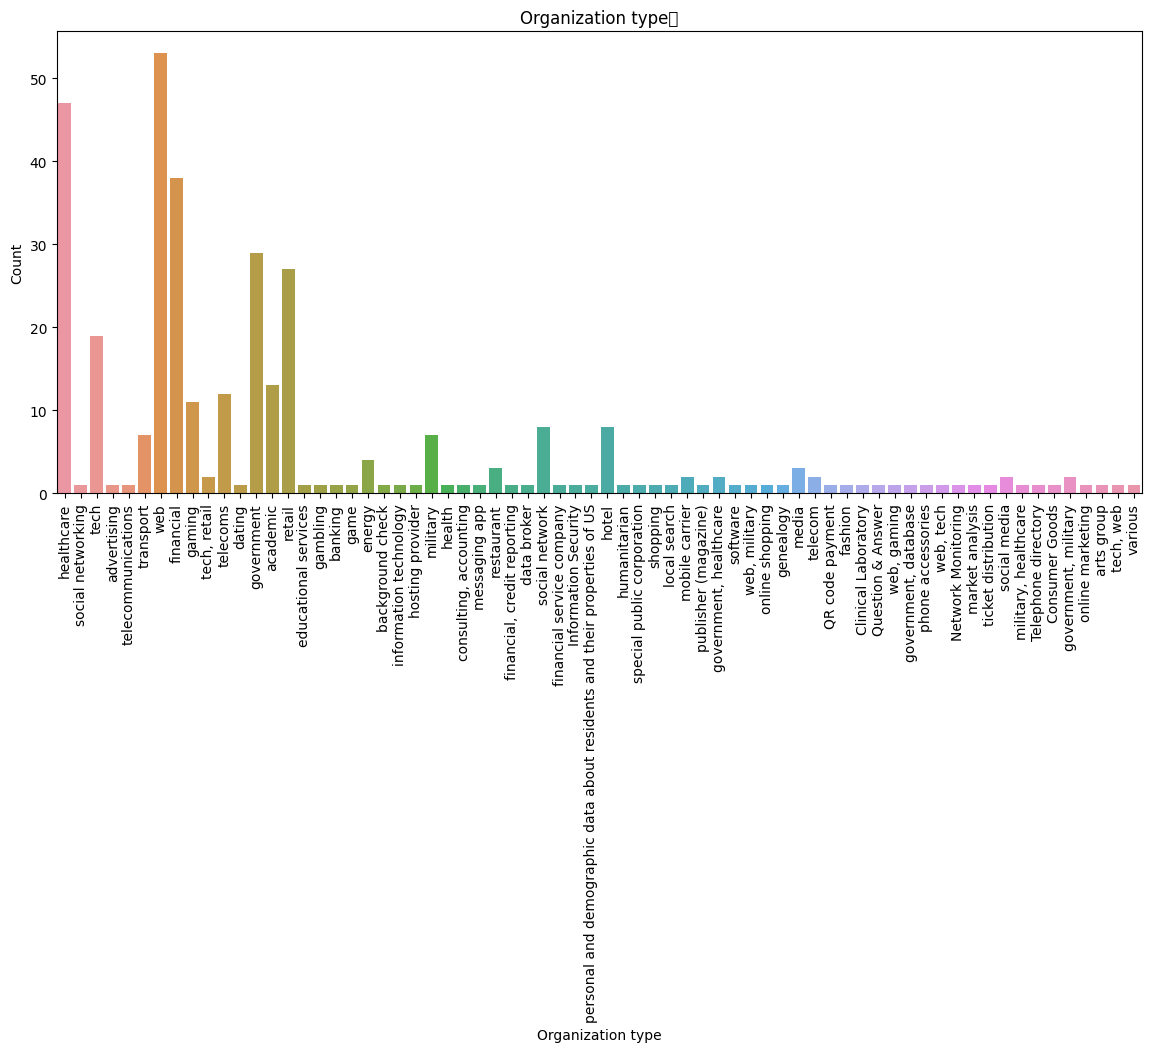

In [ ]:
# Number of attacks per Organization
plt.figure(figsize=(14, 6))
sns.countplot(x='Organization type', data=df)
plt.title('Organization type	')
plt.xlabel('Organization type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

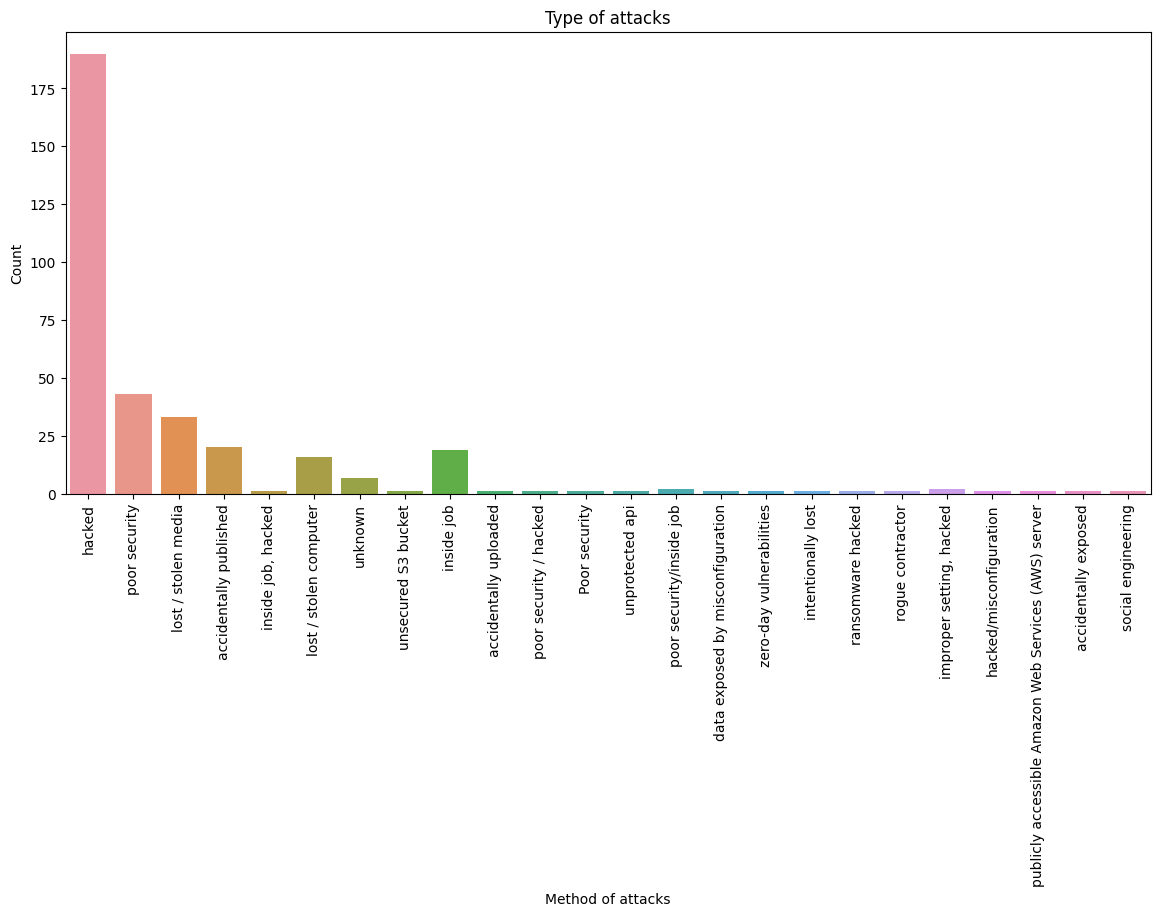

In [ ]:
# Ocurrence per attack
plt.figure(figsize=(14, 6))
sns.countplot(x='Method', data=df)
plt.title('Type of attacks')
plt.xlabel('Method of attacks')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

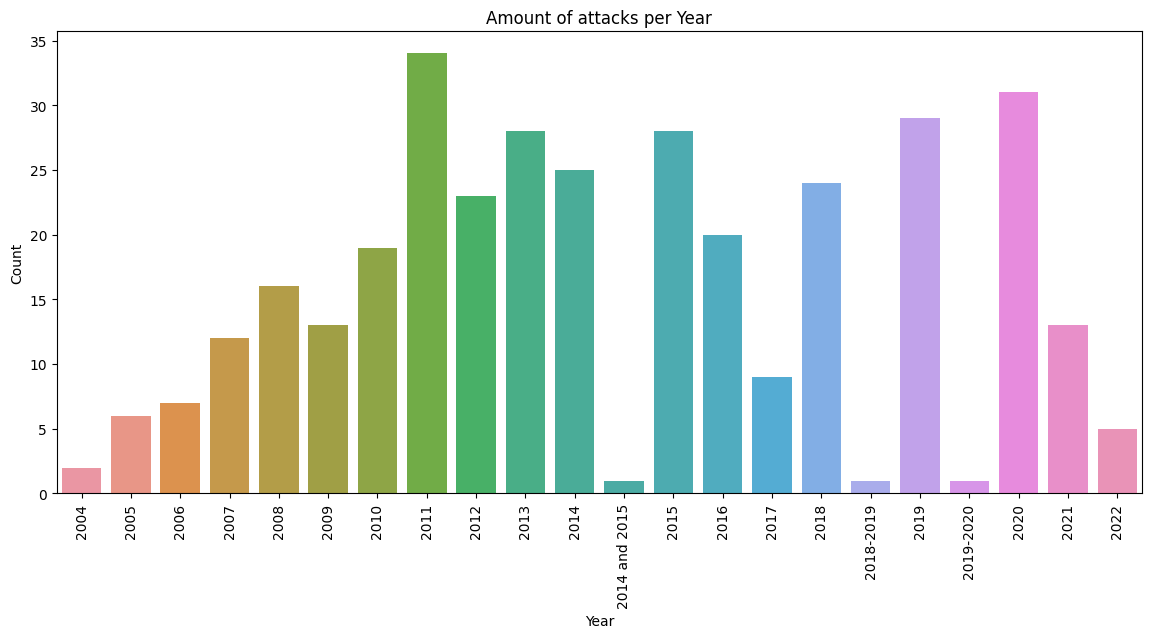

In [ ]:
# Count of attacks per year
plt.figure(figsize=(14, 6))
sns.countplot(x='Year', data=df, order=sorted(df['Year'].unique()))
plt.title('Amount of attacks per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#correlation amongst two categorical variables, use of heatmap example
'''
data = {
    'Category1': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B', 'C'],
    'Category2': ['X', 'Y', 'X', 'Y', 'Z', 'X', 'X', 'Y', 'Z']
}

df_ex = pd.DataFrame(data)
contingency_table = pd.crosstab(df_ex['Category1'], df_ex['Category2'])
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Categorical Correlation Heatmap')
plt.show()
'''



"\ndata = {\n    'Category1': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B', 'C'],\n    'Category2': ['X', 'Y', 'X', 'Y', 'Z', 'X', 'X', 'Y', 'Z']\n}\n\ndf_ex = pd.DataFrame(data)\ncontingency_table = pd.crosstab(df_ex['Category1'], df_ex['Category2'])\nsns.heatmap(contingency_table, annot=True, cmap='YlGnBu')\nplt.title('Categorical Correlation Heatmap')\nplt.show()\n"

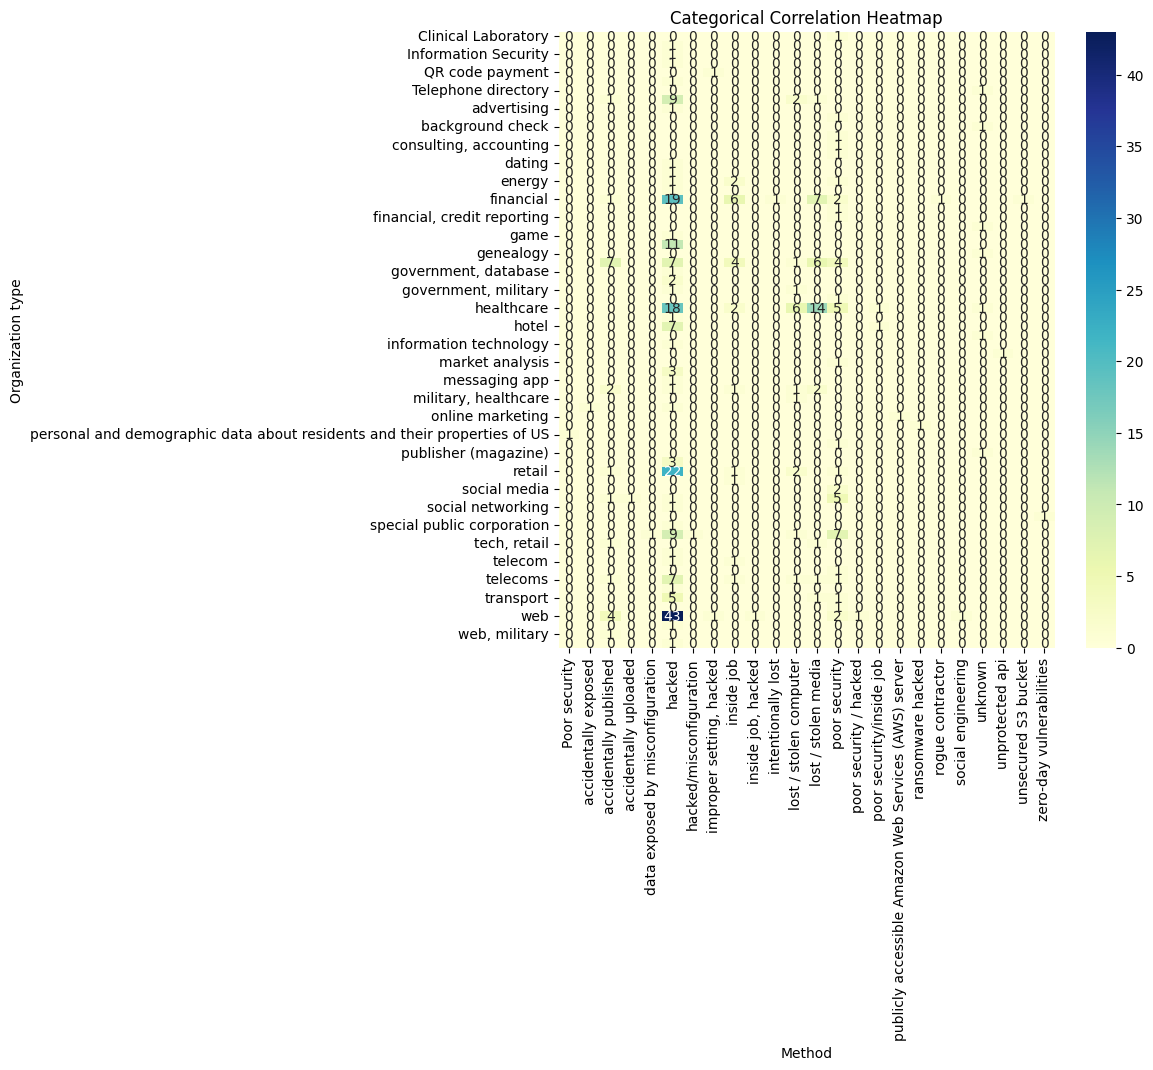

In [ ]:
'''
Correlation among 'Organization type' and 'Method'
'''
contingency_table = pd.crosstab(df['Organization type'], df['Method'])
plt.figure(figsize=(8, 8))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Categorical Correlation Heatmap')
plt.show()



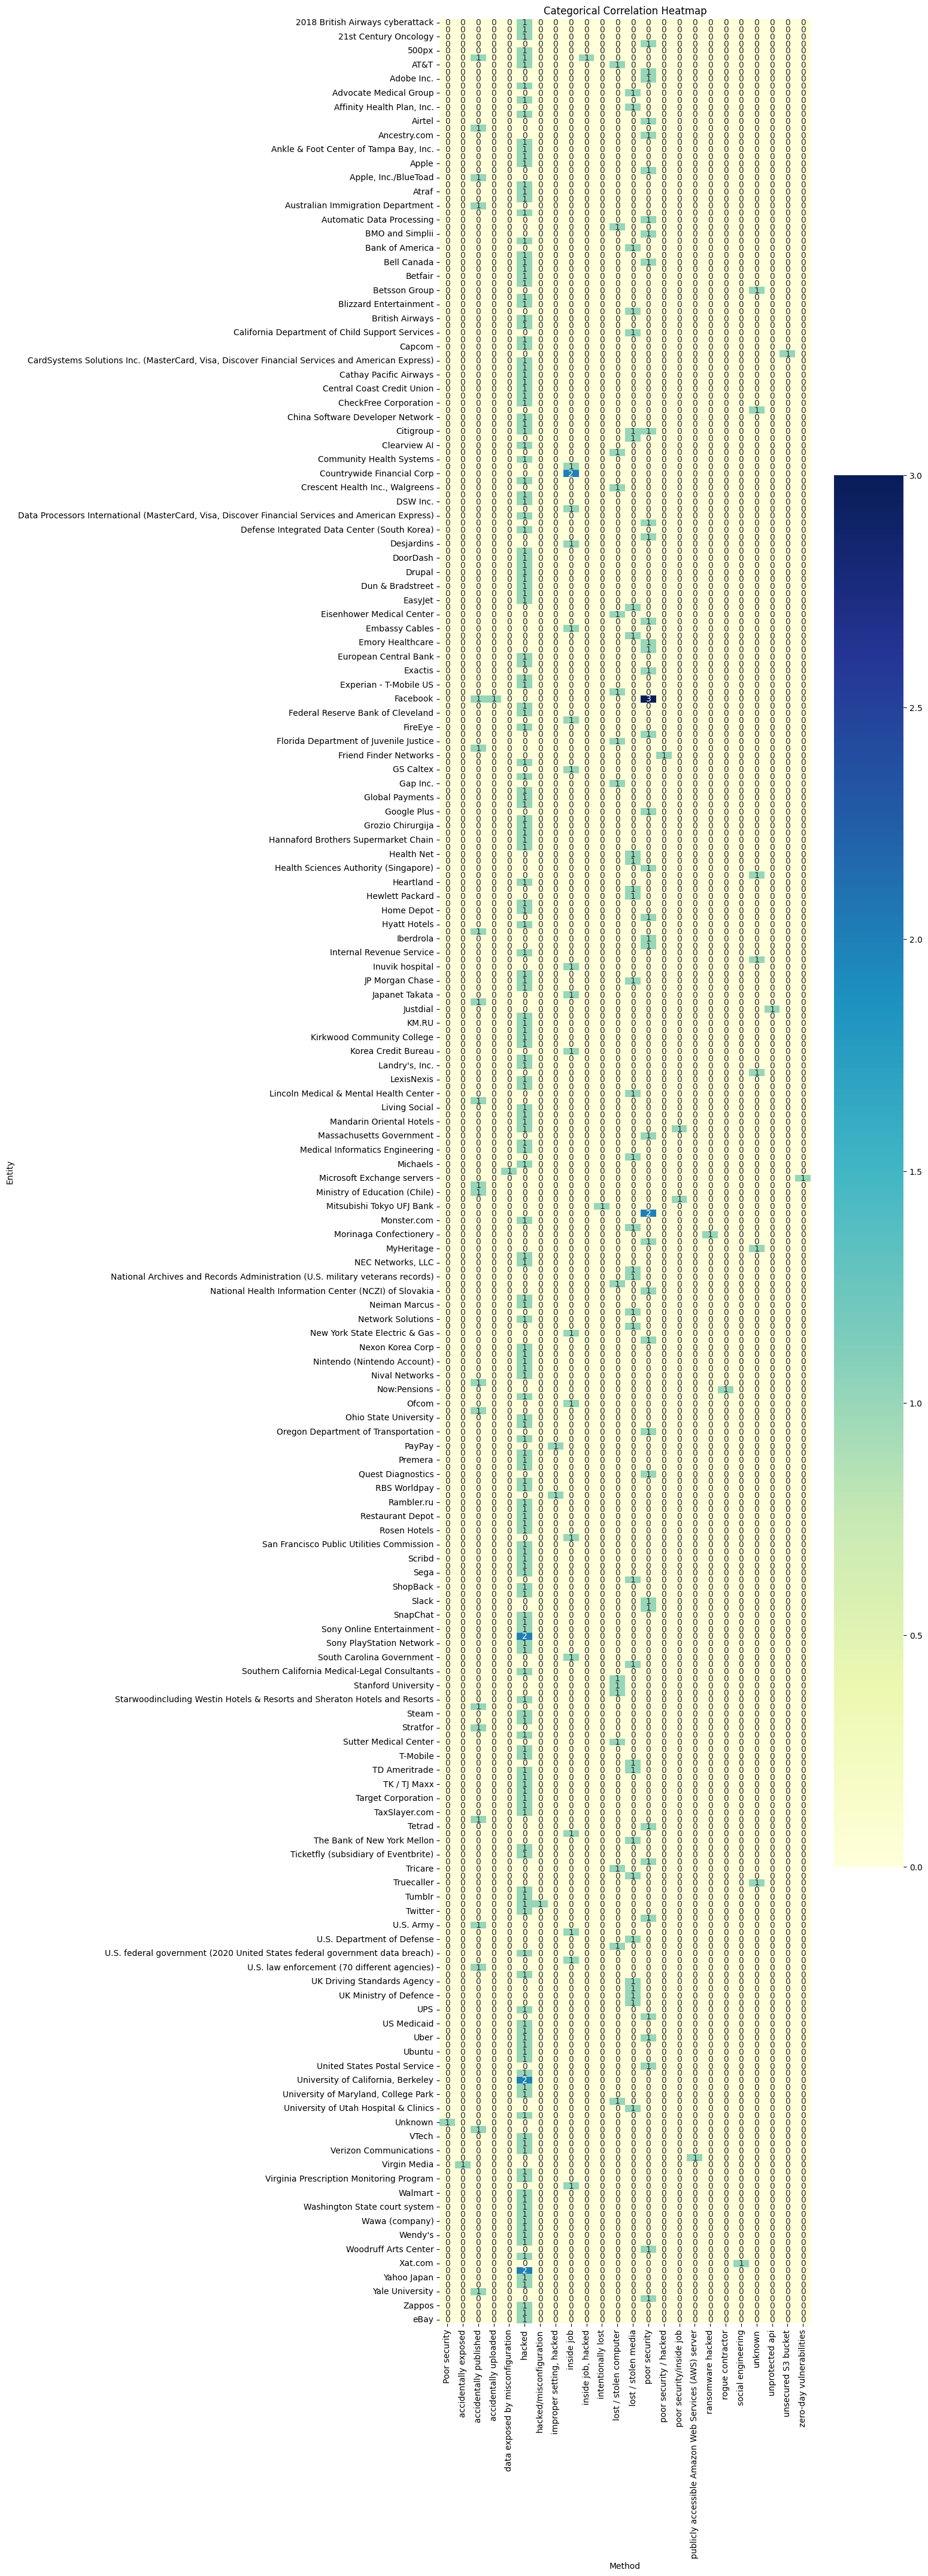

In [ ]:
'''
Correlation among 'Entity' and 'Method'
'''
contingency_table = pd.crosstab(df['Entity'], df['Method'])
plt.figure(figsize=(10, 50))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Categorical Correlation Heatmap')
plt.show()

In [ ]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

Entity               0
Year                 0
Records              0
Organization type    0
Method               0
dtype: int64

In [ ]:
columns_to_check = ['Method']
unique_values_dict = {}
for column in columns_to_check:
    unique_values_dict[column] = df[column].unique()

for column, unique_values in unique_values_dict.items():
    print(f"Unique values in {column}: {unique_values}")

Unique values in Method: ['hacked' 'poor security' 'lost / stolen media' 'accidentally published'
 'inside job, hacked' 'lost / stolen computer' 'unknown'
 'unsecured S3 bucket' 'inside job' 'accidentally uploaded'
 'poor security / hacked' 'Poor security' 'unprotected api'
 'poor security/inside job' 'data exposed by misconfiguration'
 'zero-day vulnerabilities' 'intentionally lost' 'ransomware hacked'
 'rogue contractor' 'improper setting, hacked' 'hacked/misconfiguration'
 'publicly accessible Amazon Web Services (AWS) server'
 'accidentally exposed' 'social engineering']


pu instruction on the side

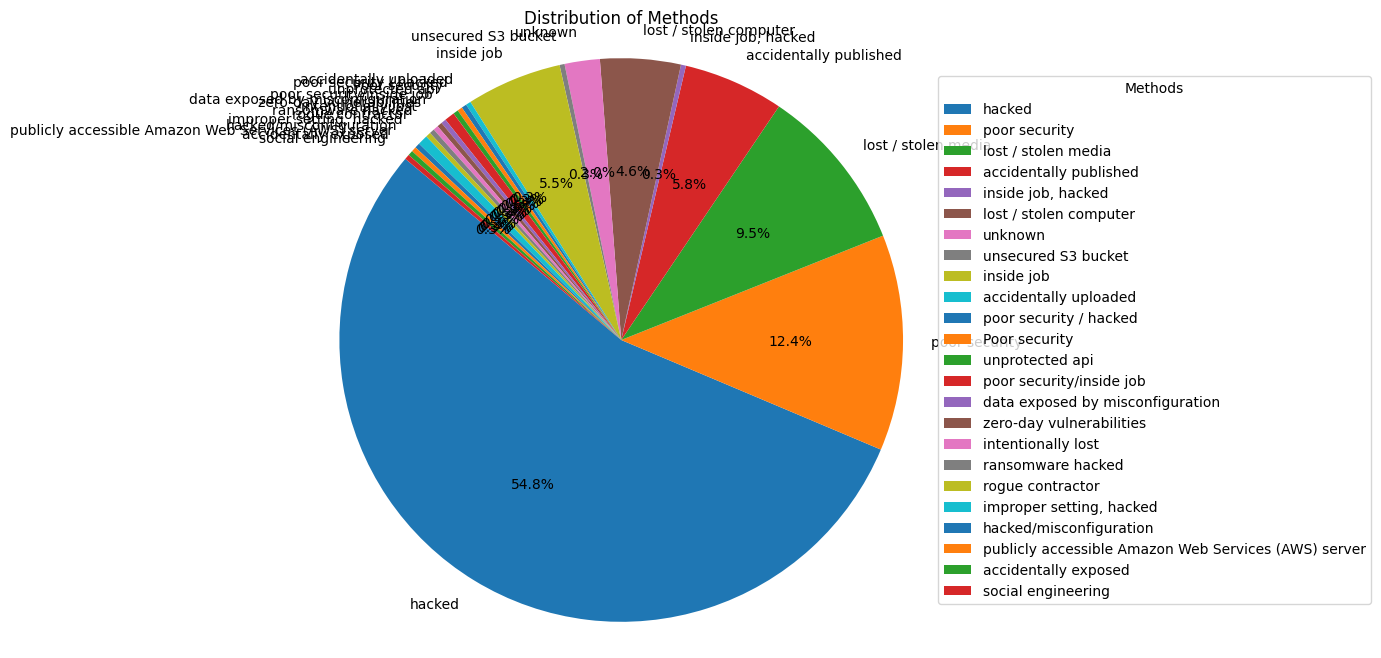

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with a column named 'Method' containing method names
method_counts = Counter(df["Method"])
methods = list(method_counts.keys())
counts = list(method_counts.values())
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(counts, labels=methods, autopct='%1.1f%%', startangle=140)

# Title and equal aspect ratio
plt.title("Distribution of Methods")
plt.axis('equal')

# Add a legend on the side as a list
plt.legend(methods, title="Methods", loc="center left", bbox_to_anchor=(1, 0.5))

# Show the pie chart
plt.show()


1. Date
2. lowercase
3. new dataset for Regression model

p.s Aida

In [ ]:
'''
                                                                     -----Data Cleaning: df["Year"]-----
'''
#changes year values with more than 1 year into the first year it states
for i in df['Year']:
  if len(i) != 4:
    print(i)
df.replace(to_replace='2019-2020',value=2019,inplace=True)
df.replace(to_replace='2018-2019',value=2018,inplace=True)
df.replace(to_replace='2014 and 2015',value=2015,inplace=True)

#converts all years into ints since the string values have been replaced
for i in df['Year']:
  df.replace(to_replace=i,value=int(i),inplace=True)
df['Year'].dtypes

2019-2020
2018-2019
2014 and 2015


dtype('int64')

In [ ]:
df["Organization type"] = df["Organization type"].str.lower()
df["Organization type"].unique()


array(['healthcare', 'social networking', 'tech', 'advertising',
       'telecommunications', 'transport', 'web', 'financial', 'gaming',
       'tech, retail', 'telecoms', 'dating', 'government', 'academic',
       'retail', 'educational services', 'gambling', 'banking', 'game',
       'energy', 'background check', 'information technology',
       'hosting provider', 'military', 'health', 'consulting, accounting',
       'messaging app', 'restaurant', 'financial, credit reporting',
       'data broker', 'social network', 'financial service company',
       'information security',
       'personal and demographic data about residents and their properties of us',
       'hotel', 'humanitarian', 'special public corporation', 'shopping',
       'local search', 'mobile carrier', 'publisher (magazine)',
       'government, healthcare', 'software', 'web, military',
       'online shopping', 'genealogy', 'media', 'telecom',
       'qr code payment', 'fashion', 'clinical laboratory',
       'qu

In [ ]:
'''
                                                                     -----Data Cleaning: df["Organizatio type"]-----
'''

#grouping similar values
for i in df['Organization type']:
  #gaming
  if i=='game'or i=='web, gaming' or i=='gambling':
    df.replace(to_replace=i,value='gaming',inplace=True)
  #healthcare
  if i=='health' or i== 'clinical laboratory':
    df.replace(to_replace=i,value='healthcare',inplace=True)
  #finance
  if i=='financial, credit reporting'or i=='financial service company'or i=='financial' or i== 'banking':
    df.replace(to_replace=i,value='finance',inplace=True)
  #tech
  if i=='tech, web'or i=='web, tech'or i=="software" or i=="information security" or i=="information technology" :
    df.replace(to_replace=i,value='tech',inplace=True)
  #social media
  if i=='messaging app'or i=='dating' or i=='social network' or i=="social networking":
    df.replace(to_replace=i,value='social media',inplace=True)
  #telecomunications
  if i=='telecoms' or i=='telecom':
    df.replace(to_replace=i,value='telecommunications',inplace=True)
  #marketing
  if i=='market analysis' or i=='online marketing' or i=='advertising' or i=='media':
    df.replace(to_replace=i,value='marketing',inplace=True)
  #various
  if i=='tech, retail' or i=='web, military' or i=='consulting, accounting' or i=='military, healthcare' or i=='government, healthcare'or i=='government, military'or i=='government, database':
    df.replace(to_replace=i,value='various',inplace=True)
  #consumer goods
  if i=='online shopping' or i=='shopping' or i=='phone accessories' or i =='fashion' or i=='retail':
    df.replace(to_replace=i,value='consumer goods',inplace=True)
  #academic
  if i=='educational services':
    df.replace(to_replace=i,value='academic',inplace=True)
  #paid services
  if i =='energy'or i=='mobile carrier' or i== 'hosting provider' or i== 'publisher (magazine)' or i == 'genealogy' or i == 'qr code payment' or i=='data broker' or i=='personal and demographic data about residents and their properties of us':
    df.replace(to_replace=i,value='paid services', inplace=True)
  #other
  if i=='background check' or i=='humanitarian' or i== 'special public corporation' or i== 'question & answer' or i=='ticket distribution' or i=='telephone directory' or i== 'arts group' or i== 'local search' or i=='network monitoring':
    df.replace(to_replace=i,value='other', inplace=True)

In [ ]:
df["Organization type"].value_counts()

web                   53
healthcare            49
finance               41
consumer goods        32
government            29
tech                  24
telecommunications    15
academic              14
gaming                14
social media          13
paid services         12
various               11
other                  9
hotel                  8
transport              7
military               7
marketing              6
restaurant             3
Name: Organization type, dtype: int64

In [ ]:
'''
                                                                     -----Data Cleaning: df["Records"]-----
'''

print("Values changed to 0 temporarily: ")
for i in df["Records"]:
  #converts unknown values in "Records" to 0, but they will later get changed to the mean value for this column once the rest of the values are cleaned
  if i=="unknown" or i=="unknown (client list)"or i=="tens of thousands" or i=="Unknown" or i=="undisclosed" or i=="Source Code Compromised"or i =="19 years of data" or i=="TBC":
    df.replace(to_replace=i,value=0,inplace=True)
    print(i)

 #converts values assigned with file sizes to 0 for the same reason as above
  if i=="235 GB" or i=="2.5GB" or i=="100 terabytes":
    df.replace(to_replace=i,value=0,inplace=True)
    print(i)

 #converts values assigned with  number of locations/stores to 0 for the same reason as above
  if i=="63 stores" or i=="500 locations" or i=="10 locations" or i=="93 stores" or i=="54 locations" or i=="200 stores" or i=="8 locations" or i=="51 locations" or i=="250 locations" :
    df.replace(to_replace=i,value=0,inplace=True)
    print(i)


Values changed to 0 temporarily: 
unknown
19 years of data
63 stores
tens of thousands
unknown (client list)
235 GB
Unknown
2.5GB
250 locations
500 locations
10 locations
93 stores
undisclosed
Source Code Compromised
100 terabytes
54 locations
200 stores
8 locations
51 locations
TBC


In [ ]:
'''
                                                                     -----Data Cleaning: df["Records"]-----
'''

print("Values changed to specific alternatives: ")
for i in df["Records"]:
  if i=="G20 world leaders":
     df.replace(to_replace=i,value=19,inplace=True) #replaces to 19 since there are 19 G20 leaders
     print(i)

  if i=="over 5,000,000" or i=="millions":
     df.replace(to_replace=i,value=5000000,inplace=True) #changes unspecified values in the millions to 5 million
     print(i)

  if i=="350 clients emails":
     df.replace(to_replace=i,value=350,inplace=True)#removes string portion of value
     print(i)

  if i=="9,000,000 (approx) - basic booking, 2208 (credit card details)":
     df.replace(to_replace=i,value=9000000,inplace=True)  # narrowed to 9 million since that is the general estimate of records compromised
     print(i+'\n')

for i in df['Records']:
  df.replace(to_replace=i,value=int(i),inplace=True) #now that all values are integers, this converts them from their string from to their int form
df['Records'].dtypes

Values changed to specific alternatives: 
G20 world leaders
over 5,000,000
millions
350 clients emails
9,000,000 (approx) - basic booking, 2208 (credit card details)



dtype('int64')

In [ ]:
'''
                                                                     -----Data Cleaning: df["Records"]-----
'''

#converts all the numbers that were previously changed to zero, to the mean number of records affected
for i in df["Records"]:
  if i==0:
   df.replace(to_replace=i,value=df["Records"].mean(),inplace=True)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


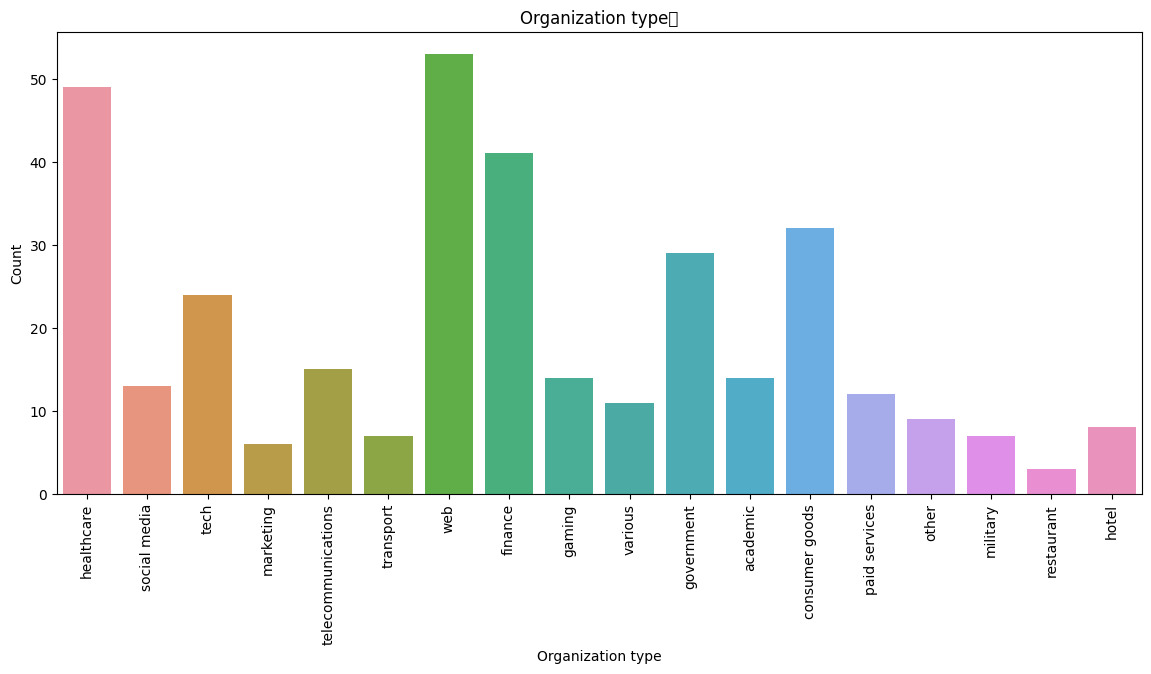

In [ ]:
# Number of attacks per Organization
plt.figure(figsize=(14, 6))
sns.countplot(x='Organization type', data=df)
plt.title('Organization type	')
plt.xlabel('Organization type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

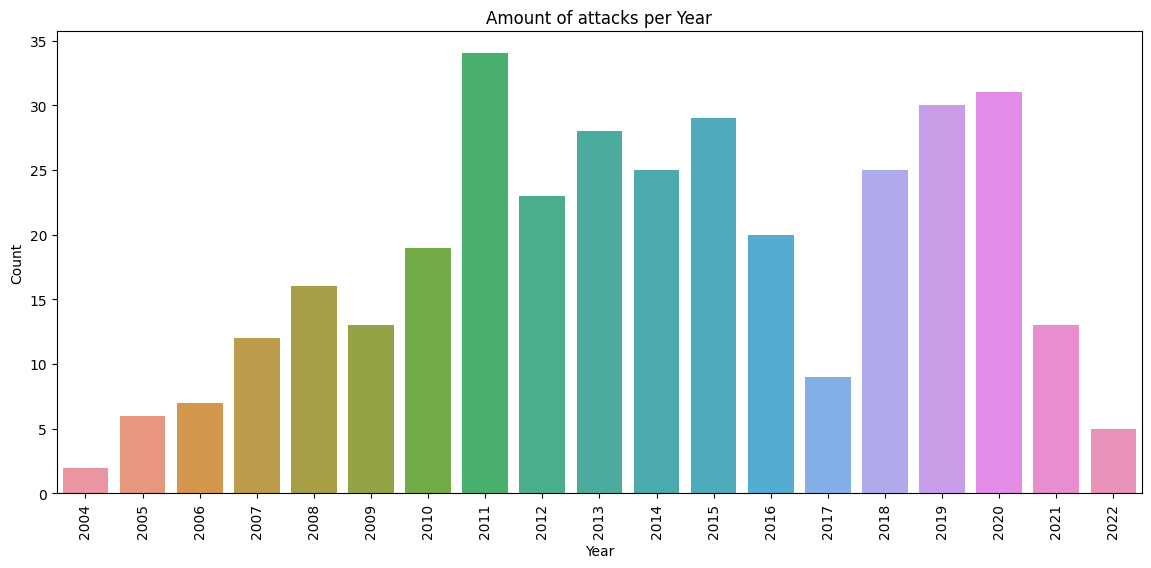

In [ ]:
# Count of attacks per year
plt.figure(figsize=(14, 6))
sns.countplot(x='Year', data=df, order=sorted(df['Year'].unique()))
plt.title('Amount of attacks per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# data = {
#     "Method": [
#         "hacked",
#         "hacked",
#         "poor security"
#     ]
# }

# df = pd.DataFrame(data)

# df['Method'] = df['Method'].str.lower()


# category_mapping = {
#     "hacked": "Hacked",
#     "poor security": "Poor Security",
#     "lost / stolen media": "Lost / Stolen Media",
#     "inside job": "Inside Job",
#     "accidentally published": "Accidentally Published",
# }

# df['Method'] = df['Method'].map(category_mapping).fillna("Other")  # Use "Other" for unmatched entries

# plt.figure(figsize=(10, 6))
# df['Method'].value_counts().plot(kind='bar')
# plt.title('Distribution of Cleaned "Method" Column')
# plt.xlabel('Category')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
df['Method'].value_counts()

hacked                                                  190
poor security                                            43
lost / stolen media                                      33
accidentally published                                   20
inside job                                               19
lost / stolen computer                                   16
38104647.74351585                                         7
improper setting, hacked                                  2
poor security/inside job                                  2
intentionally lost                                        1
accidentally exposed                                      1
publicly accessible Amazon Web Services (AWS) server      1
hacked/misconfiguration                                   1
rogue contractor                                          1
ransomware hacked                                         1
unprotected api                                           1
zero-day vulnerabilities                

In [ ]:
for i in df["Method"]:
  if i=="lost / stolen computer"or i=="lost / stolen media" or i=="intentionally lost":
     df.replace(to_replace=i,value="lost",inplace=True)

  if i=="Poor security"or i=="poor security / hacked" or i=="unsecured S3 bucket" or i=="unprotected api" or i=="poor security/inside job":
     df.replace(to_replace=i,value="poor security",inplace=True)

  if i=="accidentally published" or i=="inside job"or i=="social engineering" or i=="accidentally exposed" or i=="accidentally uploaded" or i=="publicly accessible Amazon Web Services (AWS) server" or i=="data exposed by misconfiguration" or i=="rogue contractor":
    df.replace(to_replace=i,value="published",inplace=True)

  if i=="lost / stolen computer"or i=="lost / stolen media" or i=="intentionally lost":
     df.replace(to_replace=i,value="lost",inplace=True)

  if i=="hacked/misconfiguration"or i=="ransomware hacked":
     df.replace(to_replace=i,value="hacked",inplace=True)

  if i=="zero-day vulnerabilities"or i==38104647.74351585 or i == "improper setting, hacked" or i=="inside job, hacked" :
     df.replace(to_replace=i,value="other",inplace=True)



In [ ]:
df['Method'].value_counts()

hacked           192
lost              50
poor security     49
published         45
other             11
Name: Method, dtype: int64

### **2. Data Modeling**

In [ ]:
df.head()

,Entity,Year,Records,Organization type,Method
0,21st Century Oncology,2016,2200000.0,healthcare,hacked
1,500px,2020,14870304.0,social media,hacked
2,Accendo Insurance Co.,2020,175350.0,healthcare,poor security
3,Adobe Systems Incorporated,2013,152000000.0,tech,hacked
4,Adobe Inc.,2019,7500000.0,tech,poor security


In [ ]:
df.shape

(347, 5)

In [ ]:
print(df['Entity'].dtypes)

object


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
#logistic regression
X = df.drop(columns=['Method'])
y = df['Method']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

ValueError: ignored

In [ ]:
#svm
X = df.drop(columns=['Method'])
y = df['Method']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")